# Proyecto de aprendizaje automático

Al fin han concedido un proyecto para tu *startup* de analítica con amplios conocimientos de aprendizaje automático y AI!!!! 

La **compañía de hoteles Disfrutín**, con hoteles ubicados por todo el mundo, está interesada en que construyas un modelo de clasificación de cancelaciones basándote en variables disponibles.

Para ello te ha proporcionado tres tablas:
- `bookings.csv`: contiene información de reservas
- `hotels.csv`:  contiene información sobre características de los hoteles
- `people.csv`: contiene información sobre los clientes del hotel

**La variable objetivo a estudiar es `is_canceled` y se ubica en la tabla `bookings`**

## Creación de conjuntos de datos

- Construye el conjunto de datos final basándote en las tres tablas proporcionadas, haciendo **merge** basado en las columnas naturales (`hotel` y `name`)
- Realiza una EDA con las agrupaciones que consideres y gráficos para intentar ver la influencia de algunas variables sobre la variable objetivo.
- Realiza ingeniería de atributos para ampliar los atributos iniciales con un mayor conjunto.
- Realiza una EDA para observar el impacto potencial de las variables creadas sobre la variable objetivo.

Tras este proceso, puede que tengas alguna idea de qué variables se pueden usar, cuáles son mejores predictores potenciales para estimar si se cancela o no la reserva, así como cuáles son categóricas, y cuáles son dummies.

- Genera la tabla final con todas las variables categóricas que correspondan transformadas en dummies.

## Modelado

- Divide el dataset generado en el paso anterior en entrenamiento y test siguiendo una proporción 0.8 - 0.2
- Haz uso del comando GridSearchCV junto con mallas de hiperparámetros (param_grid) y los modelos predictivos de árbol de decisión para clasificación y regresión logística estudiados, para generar un modelo predictivo óptimo que maximice la puntuación **f1-score**
- Para la mejor regresión logística obtenida, observa y pinta los coeficientes y realiza algún comentario u observación al respecto.
- Para el mejor árbol de decisión obtenido,  observa y pinta la importancia de atributos (feature importances) y realiza algún comentario u observación al respecto.
- Para el mejor modelo obtenido por la búsuqeda Gridsearchcv, realiza la predicción en TEST, y aporta las métricas accuracy, precission, recall así como la matriz de confusión, para el umbral estándar (0.5)

- Para este mejor modelo, busca el umbral que satisfaga las siguientes condiciones, evaluando en TEST:
    - Umbral mínimo que garantiza una precission del 80 %
    - Umbral máximo que garantiza un recall del 60 %
    - Umbral que maximiza la f1 score
- Para el umbral que maximiza la f1, reporta los rendimientos f1 agrupando por hotel, ¿ para qué hoteles obtienes un peor rendimiento? 

# Análisis final

Tenemos una entrevista con el departamento de marketing de la empresa para explicar los modelos obtenidos y el análisis en profundidad acometido, que asentará nuestro amplio conocimiento y habilidades analíticas de cara a la cadena hotelera y nos garantizará futuros contratos, nos preguntan elementos esenciales como:

- ¿ qué hoteles o países de hoteles tienen una mayor tasa de cancelación? 
- ¿ qué países de cliente tienen una mayor tasa de cancelación?
- ¿ existen rangos de edad para los cuales la tasa de cancelación es mayor o menor que la media?
- ¿ afecta la anticipación en la reserva de algún modo a la tasa de cancelación?
- ¿ hay algún tipo de habitación que sufra mayor propensión a las cancelaciones?
- ¿ afecta la distribución de los huéspedes de algún modo a la tasa de cancelación?
- ¿ afectan los servicios disponibles del hotel a la tasa de cancelación?
- ¿ qué activaciones de marketing/comerciales podemos realizar sobre la predicción del modelo de cancelaciones para reducir las mismas y mejorar la tasa de reservas que se completan?


Dependiendo de la brillantez en la exposición del modelo, su rendimiento y los resultados analíticos, Disfrutín iniciará con nosotros una feliz relación de colaboración en tareas de ciencia de datos, o seremos una consultora más quedará atrás tras meter un pufo en el proyecto como impostores.

# 1 Creación de conjuntos de datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df_booking = pd.read_csv("bookings.csv")
df_booking.sample()

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled
2353,03c0a3fb-e3df-4403-bd6d-15ac2ceb93d0,Virginia Brown,GZD,2022-08-08 02:34:50,1,double,0,2022-09-13,2022-09-18,2,621.2,False


In [4]:
df_hotels = pd.read_csv("hotels.csv")
df_hotels.sample()

,hotel,hotel_country,has_pool,has_spa,has_theatre,stars
2,IKL,Sierra Leone,False,False,True,2


In [5]:
df_people = pd.read_csv("people.csv")
df_people.sample()

,name,country,date_of_birth
772,Ashley Perkins,Palau,1992-12-07


In [6]:
df_final = pd.merge(df_booking, df_hotels, on="hotel")
df_final = pd.merge(df_final, df_people, on="name")
df_final.sample()

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled,hotel_country,has_pool,has_spa,has_theatre,stars,country,date_of_birth
3144,28222f8b-5a99-429a-a8a6-8ef3c44c8f64,Robert Koch,CJY,2022-10-08 00:30:46,1,single,1,2022-11-05,2022-11-12,1,488.36,False,Tokelau,False,True,False,1,Brazil,1980-04-22


In [ ]:
df_final["booking_month"] = pd.to_datetime(df_final["booking_timestamp"]).dt.month
df_final["year_of_birth"] = pd.to_datetime(df_final["date_of_birth"]).dt.year

In [7]:
df_final["booking_month"] = pd.to_datetime(df_final["booking_timestamp"]).dt.month
df_final["year_of_birth"] = pd.to_datetime(df_final["date_of_birth"]).dt.year

In [119]:
df_final.sample()

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,...,is_canceled,hotel_country,has_pool,has_spa,has_theatre,stars,country,date_of_birth,booking_month,year_of_birth
4587,4e205e25-d80c-4ee0-abc4-55b5fc8987db,Mindy Scott,SGU,2022-10-24 06:02:19,1,double,0,2022-11-29,2022-12-12,2,...,False,Iceland,False,True,True,3,Argentina,1988-07-30,10,1988


In [120]:
df_final.isnull().sum()

booking_id           0
name                 0
hotel                0
booking_timestamp    0
n_rooms              0
room_type            0
children             0
arrival_timestamp    0
leave_timestamp      0
guests               0
total_cost           0
is_canceled          0
hotel_country        0
has_pool             0
has_spa              0
has_theatre          0
stars                0
country              0
date_of_birth        0
booking_month        0
year_of_birth        0
dtype: int64

In [121]:
df_final.dtypes

booking_id            object
name                  object
hotel                 object
booking_timestamp     object
n_rooms                int64
room_type             object
children               int64
arrival_timestamp     object
leave_timestamp       object
guests                 int64
total_cost           float64
is_canceled             bool
hotel_country         object
has_pool                bool
has_spa                 bool
has_theatre             bool
stars                  int64
country               object
date_of_birth         object
booking_month          int32
year_of_birth          int32
dtype: object

# EDA

In [122]:
columnas = ["n_rooms", "children", "guests", "total_cost", "stars"]

# Agrupa por la columna "is_canceled" y calcula la media para las columnas numéricas
tabla_media_por_estado = df_final.groupby("is_canceled")[columnas].mean()
print(tabla_media_por_estado)

              n_rooms  children    guests   total_cost     stars
is_canceled                                                     
False        1.742972  0.688755  3.028973  2049.040688  2.922260
True         1.849406  0.653236  3.408190  2363.092880  2.891678


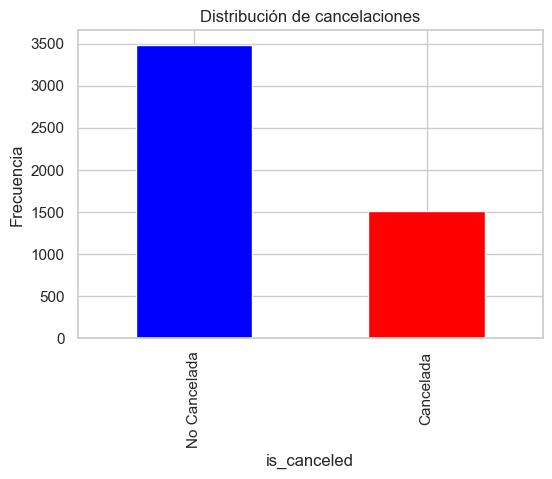

In [123]:
plt.figure(figsize=(6, 4))
df_final["is_canceled"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.title("Distribución de cancelaciones")
plt.xlabel("is_canceled")
plt.ylabel("Frecuencia")
plt.xticks([0, 1], ["No Cancelada", "Cancelada"])
plt.show()

In [124]:
df_final.groupby(["is_canceled"]).stars.mean()

is_canceled
False    2.922260
True     2.891678
Name: stars, dtype: float64

## Hespedes

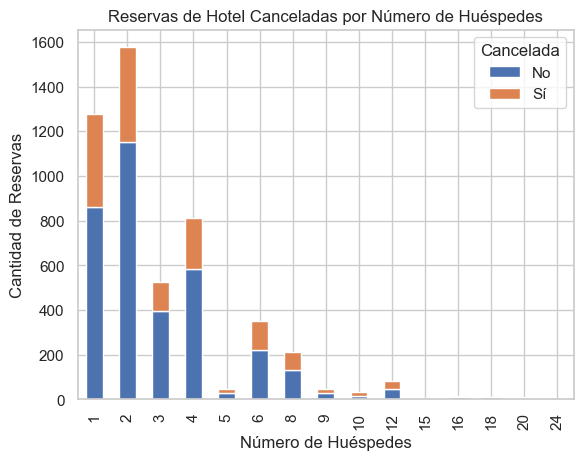

In [125]:
reservas_por_huespedes = (
    df_final.groupby(["guests", "is_canceled"]).size().unstack(fill_value=0)
)
reservas_por_huespedes.plot(kind="bar", stacked=True)

plt.xlabel("Número de Huéspedes")
plt.ylabel("Cantidad de Reservas")
plt.title("Reservas de Hotel Canceladas por Número de Huéspedes")
plt.legend(title="Cancelada", labels=["No", "Sí"])

plt.show()

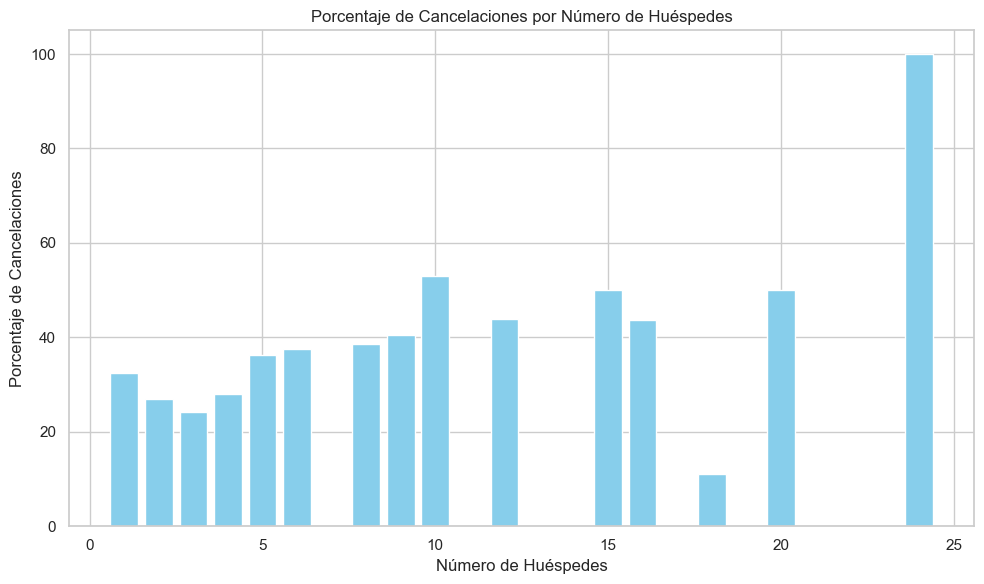

In [126]:
grupo_por_huespedes = df_final.groupby("guests").is_canceled.mean() * 100

# Renombrar la columna resultante para mayor claridad
grupo_por_huespedes = grupo_por_huespedes.reset_index()
grupo_por_huespedes.rename(
    columns={"is_canceled": "Porcentaje de Cancelaciones"}, inplace=True
)

plt.figure(figsize=(10, 6))
plt.bar(
    grupo_por_huespedes["guests"],
    grupo_por_huespedes["Porcentaje de Cancelaciones"],
    color="skyblue",
)
plt.title("Porcentaje de Cancelaciones por Número de Huéspedes")
plt.xlabel("Número de Huéspedes")
plt.ylabel("Porcentaje de Cancelaciones")


plt.tight_layout()
plt.show()

## Tipo de habitacion

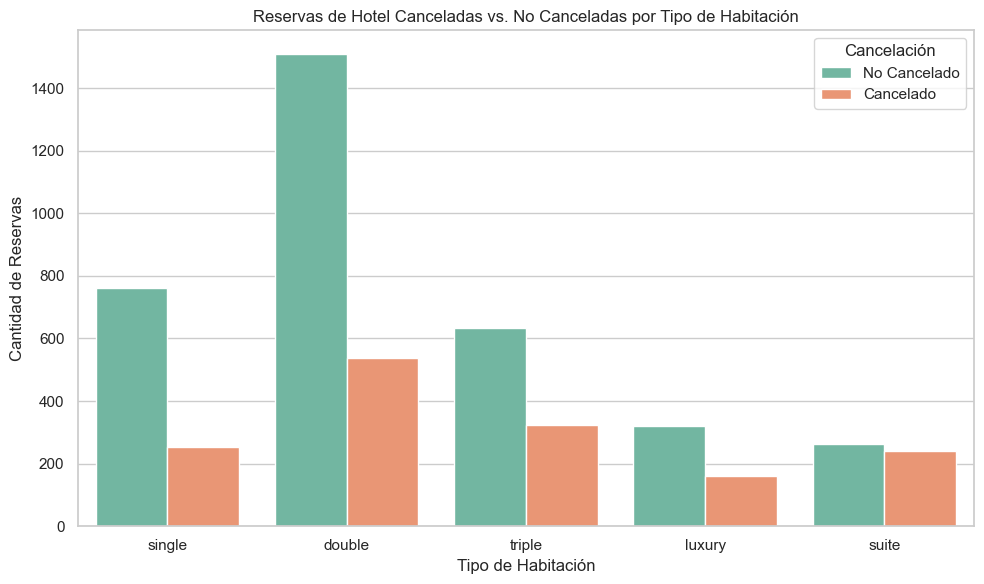

In [127]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df_final, x="room_type", hue="is_canceled", palette="Set2")
plt.title("Reservas de Hotel Canceladas vs. No Canceladas por Tipo de Habitación")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Cancelación", loc="upper right", labels=["No Cancelado", "Cancelado"])

plt.tight_layout()
plt.show()

## Stars

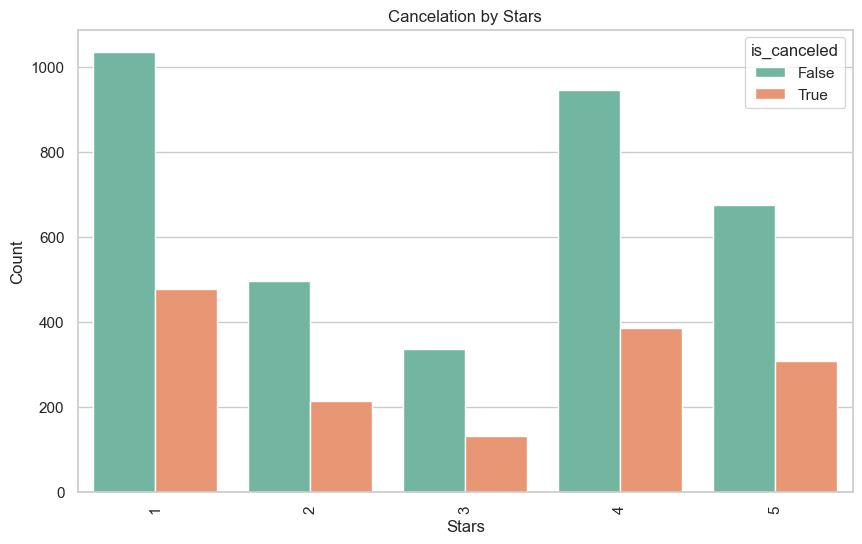

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x="stars", hue="is_canceled", palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Cancelation by Stars")
plt.show()

## Pais del hotel

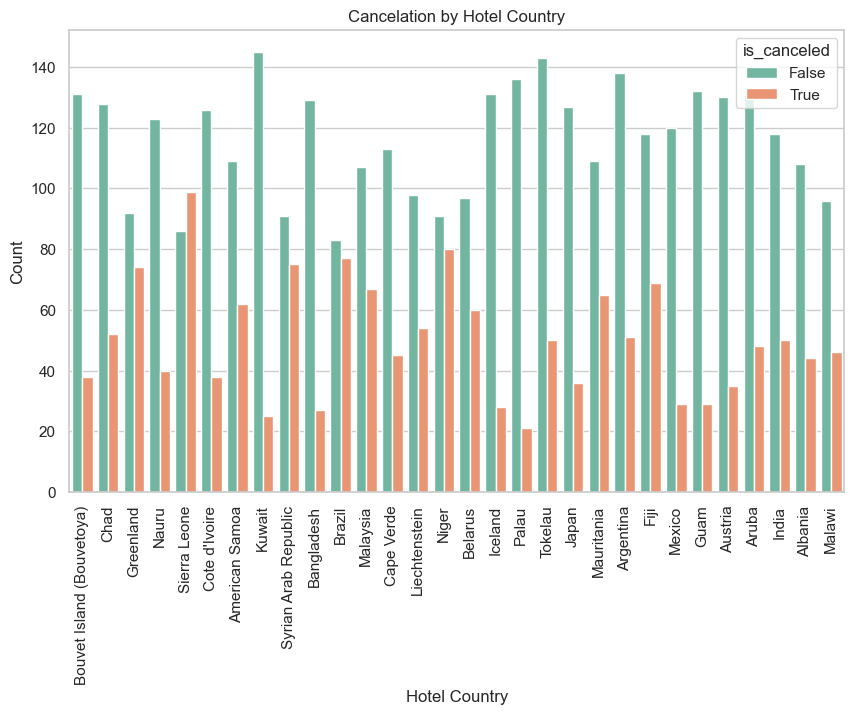

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x="hotel_country", hue="is_canceled", palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Hotel Country")
plt.ylabel("Count")
plt.title("Cancelation by Hotel Country")
plt.show()

## Coste 

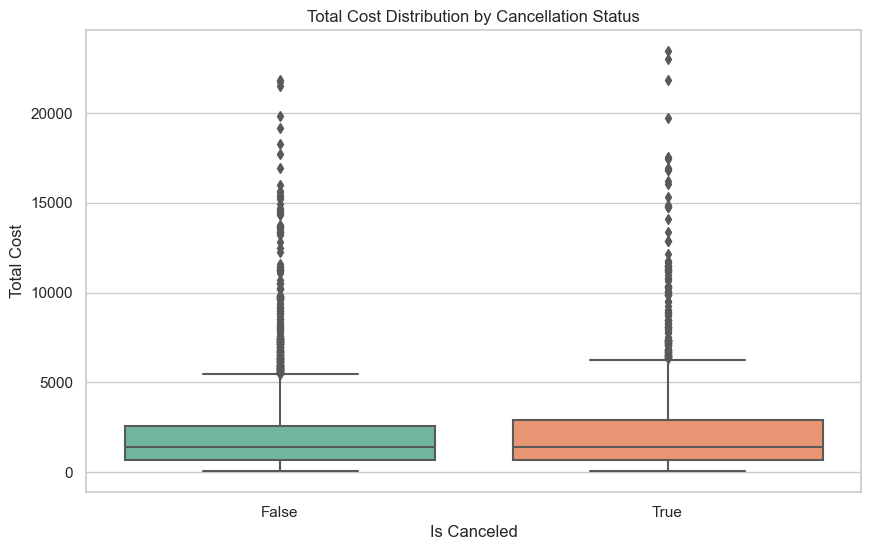

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x="is_canceled", y="total_cost", palette="Set2")
plt.xlabel("Is Canceled")
plt.ylabel("Total Cost")
plt.title("Total Cost Distribution by Cancellation Status")
plt.show()

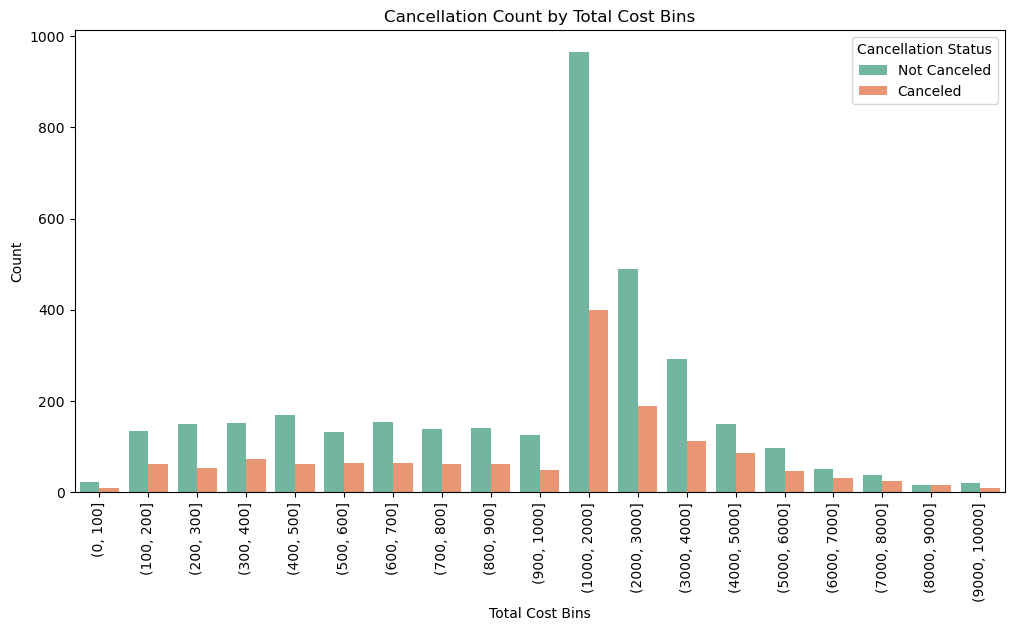

In [9]:
# Definir los rangos para agrupar "total_cost"
total_cost_bins = [
    0,
    100,
    200,
    300,
    400,
    500,
    600,
    700,
    800,
    900,
    1000,
    2000,
    3000,
    4000,
    5000,
    6000,
    7000,
    8000,
    9000,
    10000,
]

# Agrupar "total_cost" en los rangos definidos
df_final["total_cost_bins"] = pd.cut(df_final["total_cost"], bins=total_cost_bins)

# Crear un countplot para visualizar las cancelaciones por rango de "total_cost"
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x="total_cost_bins", hue="is_canceled", palette="Set2")

plt.xlabel("Total Cost Bins")
plt.ylabel("Count")
plt.title("Cancellation Count by Total Cost Bins")
plt.xticks(rotation=90)
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.show()

# Eliminar la columna temporal 'total_cost_bins'
df_final.drop(columns=["total_cost_bins"], inplace=True)

## Año de nacimiento

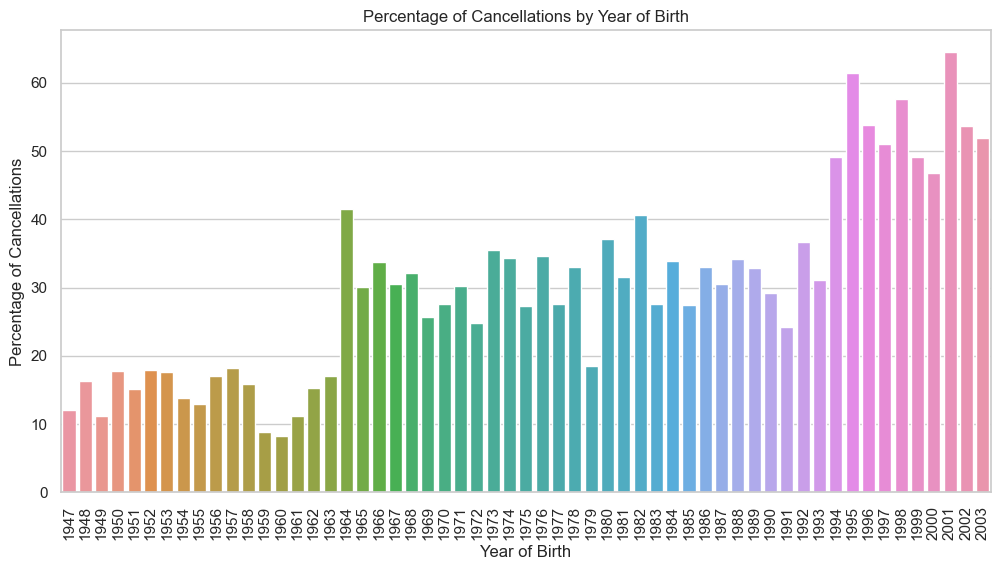

In [132]:
# Calcular el porcentaje de cancelaciones por año de nacimiento
cancelation_by_year = df_final.groupby("year_of_birth")["is_canceled"].mean() * 100

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(x=cancelation_by_year.index, y=cancelation_by_year.values)
plt.xticks(rotation=90)
plt.xlabel("Year of Birth")
plt.ylabel("Percentage of Cancellations")
plt.title("Percentage of Cancellations by Year of Birth")
plt.show()

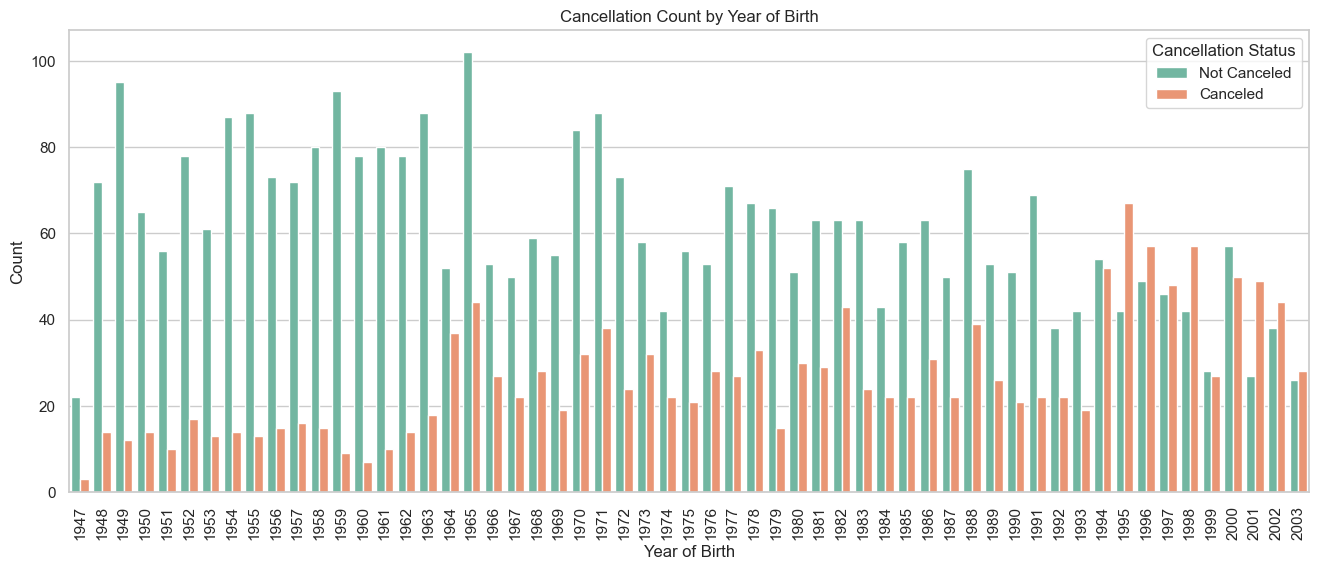

In [133]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_final, x="year_of_birth", hue="is_canceled", palette="Set2")

plt.xlabel("Year of Birth")
plt.ylabel("Count")
plt.title("Cancellation Count by Year of Birth")
plt.xticks(rotation=90)
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.show()

## Pais cliente

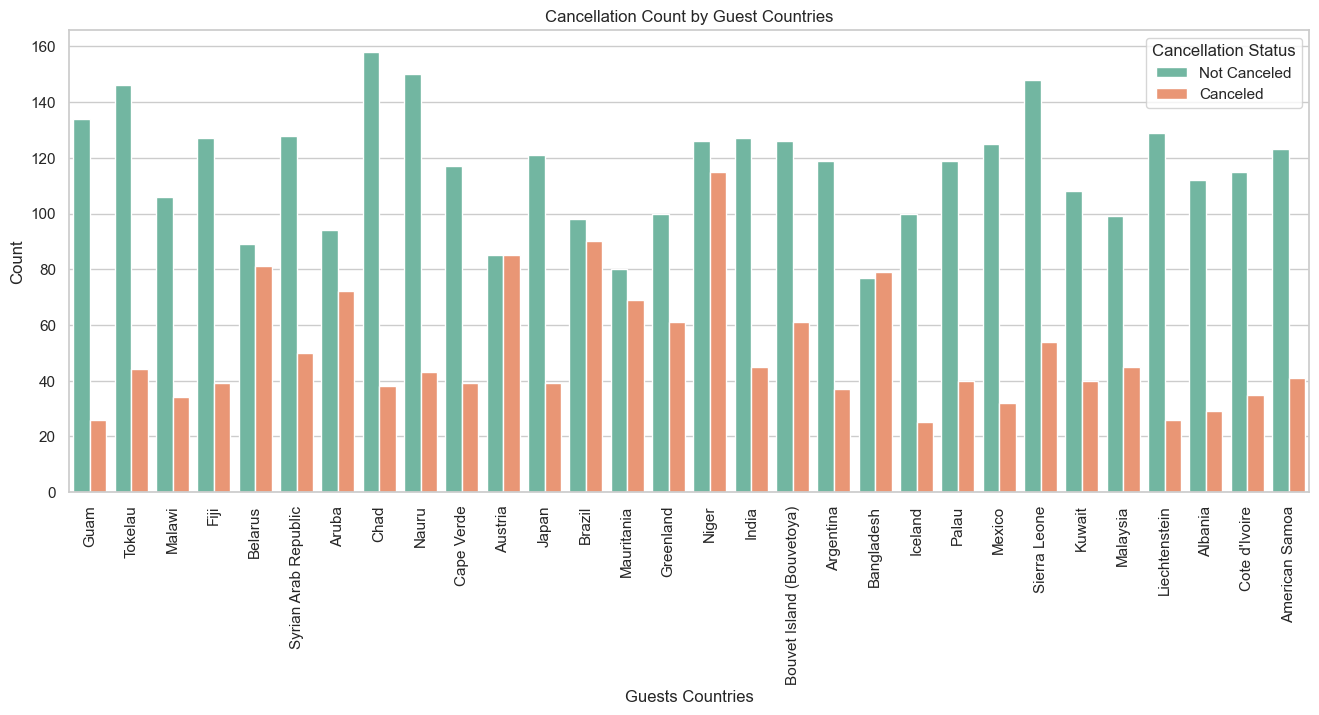

In [134]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_final, x="country", hue="is_canceled", palette="Set2")

plt.xlabel("Guests Countries")
plt.ylabel("Count")
plt.title("Cancellation Count by Guest Countries")
plt.xticks(rotation=90)
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.show()

## Extras hotel

### Spa

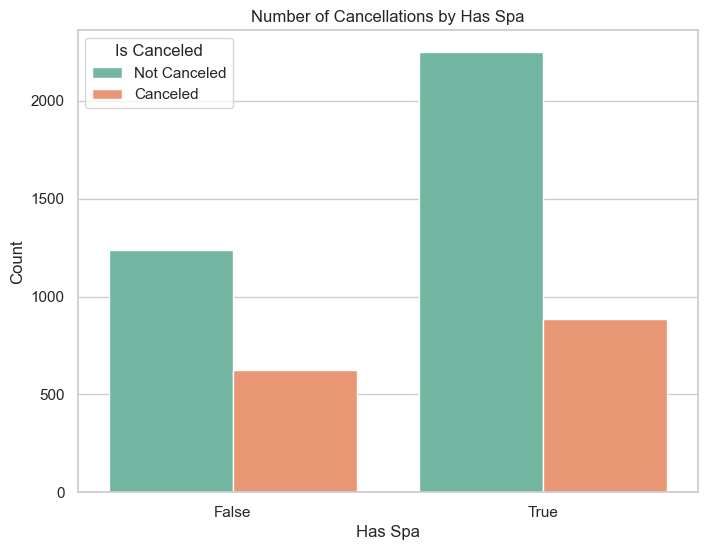

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x="has_spa", hue="is_canceled", palette="Set2")
plt.xlabel("Has Spa")
plt.ylabel("Count")
plt.title("Number of Cancellations by Has Spa")
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.show()

### Piscina

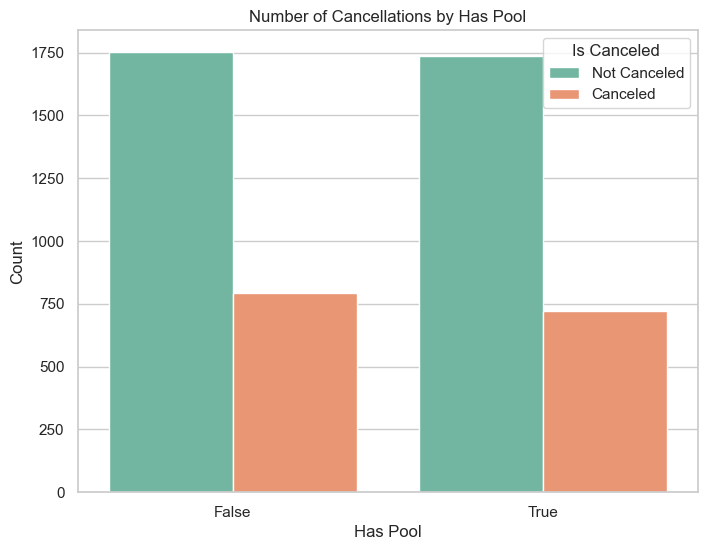

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x="has_pool", hue="is_canceled", palette="Set2")
plt.xlabel("Has Pool")
plt.ylabel("Count")
plt.title("Number of Cancellations by Has Pool")
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.show()

### Teatro

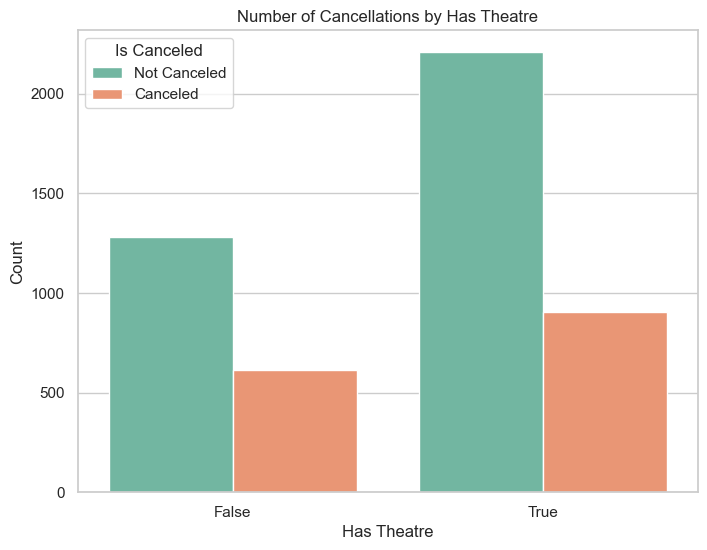

In [137]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x="has_theatre", hue="is_canceled", palette="Set2")
plt.xlabel("Has Theatre")
plt.ylabel("Count")
plt.title("Number of Cancellations by Has Theatre")
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.show()

## Mes de reserva

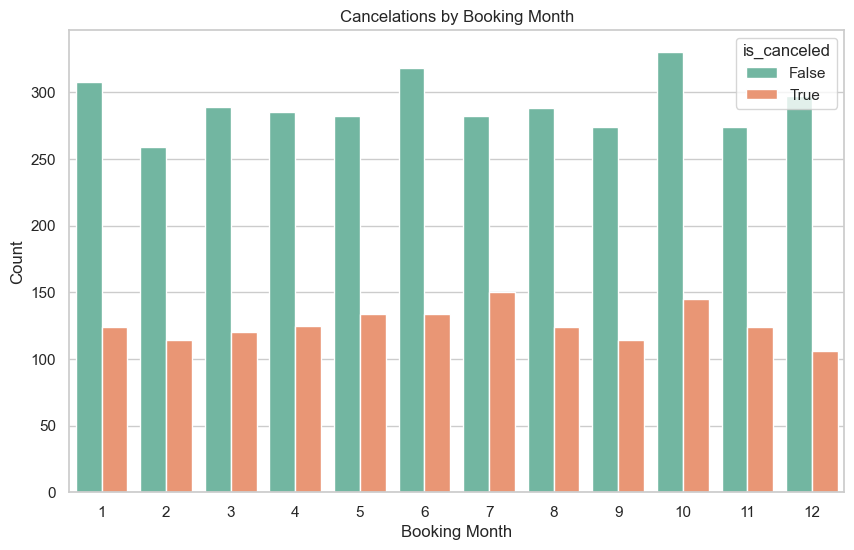

In [138]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x="booking_month", hue="is_canceled", palette="Set2")
plt.xlabel("Booking Month")
plt.ylabel("Count")
plt.title("Cancelations by Booking Month")
plt.show()

In [139]:
from scipy.stats import pointbiserialr

# Calcular el coeficiente de correlación de punto biserial
correlation, p_value = pointbiserialr(
    df_final["booking_month"], df_final["is_canceled"]
)

print(f"Coeficiente de correlación de punto biserial: {correlation}")
print(f"Valor p: {p_value}")

Coeficiente de correlación de punto biserial: -0.0044712353703617695
Valor p: 0.7519367661658308


## Dummies

In [140]:
# features = ["booking_month", "hotel_country", "room_type", "guests"]
# categorical_columns = ["hotel_country", "room_type"]

In [141]:
# features = ["hotel_country", "guests"]
# categorical_columns = ["hotel_country"]

In [142]:
# features = ["hotel_country", "guests", "year_of_birth", "total_cost"]
# categorical_columns = ["hotel_country"]

In [143]:
# features = ["hotel_country", "year_of_birth", "country"]
# categorical_columns = ["hotel_country", "country"]

In [144]:
features = ["year_of_birth", "country"]
categorical_columns = ["country"]

In [145]:
X_aux = df_final[features].copy()
y = df_final.is_canceled
X_aux.shape, y.shape

((5000, 2), (5000,))

In [146]:
X_aux.sample(5)

,year_of_birth,country
162,1977,Guam
2404,1995,Chad
4374,1996,Brazil
3500,1965,Niger
2083,1965,Fiji


In [147]:
X = pd.get_dummies(
    X_aux,
    columns=categorical_columns,
    # drop_first=True
)
X.sample(5)

,year_of_birth,country_Albania,country_American Samoa,country_Argentina,country_Aruba,country_Austria,country_Bangladesh,country_Belarus,country_Bouvet Island (Bouvetoya),country_Brazil,...,country_Malawi,country_Malaysia,country_Mauritania,country_Mexico,country_Nauru,country_Niger,country_Palau,country_Sierra Leone,country_Syrian Arab Republic,country_Tokelau
413,1976,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3686,1997,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2340,1980,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4048,1972,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1559,1977,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
X.shape, y.shape

((5000, 31), (5000,))

# Model

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (4000, 31)
Forma de X_test: (1000, 31)
Forma de y_train: (4000,)
Forma de y_test: (1000,)


## Arbol de decision

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from numpy import arange

### Entrenamiento

In [153]:
# Definir la malla de hiperparámetros a explorar
# param_grid_dt = {
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["auto", "sqrt", "log2"],
# }

param_grid_dt = {
    "max_depth": arange(3, 15), 
    "criterion": ["gini", "entropy"],
    "max_leaf_nodes": [2**4, 2**6, 2**8, 2**10],
    "min_samples_leaf": [10, 20, 30, 90],
}
# Crear el objeto GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid_dt,
    scoring="f1",
    cv=5,
    n_jobs=6,
    refit=True,
)

# Ajustar el modelo a los datos de entrenamiento
grid_search_dt.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_dt = grid_search_dt.best_params_

# Obtener el modelo con los mejores hiperparámetros
best_model_dt = grid_search_dt.best_estimator_

best_score_dt = grid_search_dt.best_score_

# Predecir en el conjunto de prueba
y_pred_dt = best_model_dt.predict(X_test)

print("Mejores hiperparámetros para Árbol de Decisión:", best_params_dt)
print("best mean cross-validation score:{:.3}".format( best_score_dt))
print("Mejor modelo: ", best_model_dt)

Mejores hiperparámetros para Árbol de Decisión: {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 16, 'min_samples_leaf': 30}
best mean cross-validation score:0.473
Mejor modelo:  DecisionTreeClassifier(max_depth=11, max_leaf_nodes=16, min_samples_leaf=30,
                       random_state=0)


### Test

In [154]:
print(classification_report(y_test, y_pred_dt))
print("Precission:", precision_score(y_true=y_test, y_pred=y_pred_dt))
print("Recall:", recall_score(y_true=y_test, y_pred=y_pred_dt))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_pred_dt))

              precision    recall  f1-score   support

       False       0.78      0.83      0.80       700
        True       0.53      0.45      0.49       300

    accuracy                           0.72      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.70      0.72      0.71      1000

Precission: 0.5317460317460317
Recall: 0.44666666666666666
F1-score: 0.4855072463768116


## Regresion logística

### Entrenamiento

In [155]:
# Definir la malla de hiperparámetros a explorar
# param_grid_lr = {
#     "C": [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10],
#     "penalty": ["l1", "l2"],
#     "solver": ["liblinear", "lbfgs"],
# }
param_grid_lr = {
    "C": [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10],
}
# Crear el objeto GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=param_grid_lr,
    scoring="f1",
    # cv=5,
    n_jobs=6,
    refit=True,
)

# Ajustar el modelo a los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_lr = grid_search_lr.best_params_

# Obtener el modelo con los mejores hiperparámetros
best_model_lr = grid_search_lr.best_estimator_

# Predecir en el conjunto de prueba
y_pred_lr = best_model_lr.predict(X_test)

print("Mejores hiperparámetros para Regresión Logística:", best_params_lr)
print("Mejor modelo: ", best_model_lr)

Mejores hiperparámetros para Regresión Logística: {'C': 10}
Mejor modelo:  LogisticRegression(C=10, random_state=0)


### Test

In [156]:
print(classification_report(y_test, y_pred_lr))
print("Precission:", precision_score(y_true=y_test, y_pred=y_pred_lr))
print("Recall:", recall_score(y_true=y_test, y_pred=y_pred_lr))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

       False       0.71      0.97      0.82       700
        True       0.52      0.09      0.15       300

    accuracy                           0.70      1000
   macro avg       0.62      0.53      0.48      1000
weighted avg       0.65      0.70      0.62      1000

Precission: 0.52
Recall: 0.08666666666666667
F1-score: 0.14857142857142858
